<a href="https://colab.research.google.com/github/palomaalves/Projetos_DataScience/blob/main/Analise_Exploratoria_AdventureWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise Exploratoria Dataset AdventureWorks

Exercício de Análise Exploratória com Pandas 

Foi utilizado o dataset AdventureWorks.xlsx 

In [4]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#Alterando o estilo
#plt.style.use("ggplot")

In [5]:
#Primeira forma de upload do arquivo no Colab
#Upload do arquivo
from google.colab import files
arq = files.upload()

In [6]:
#Segunda forma de upload do arquivo através do mapeamento do drive, inserindo o caminho.
#Criando o DataFrame (df)
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [49]:
#Se houver vários dataframes, para juntar todos os arquivos
#df = pd.concat([df1,df2,df3,df4,...])

#Análise Exploratória

In [7]:
#Visualizando as 5 primeiras linhas do Dataframe
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [52]:
#Função SAMPLE exibe uma amostra aleatória do dataframe
df.sample(3) #quantidade de linhas ->3


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
240,2009-07-13,2009-07-26,307,1203,19129,200907134CS719,324.69,980.00,14,0.00,"13,720.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"4,545.66","9,174.34",13
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
217,2008-06-07,2008-06-16,199,1203,18845,200806074CS617,324.69,980.00,18,0.00,"17,640.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"5,844.42","11,795.58",9


In [69]:
#Função Value Counts são limitados apenas a uma única coluna ou série e seu único objetivo é retornar a série de frequências de valores
df["ID Produto"].value_counts(ascending=False)

366     123
1203    118
384     115
1155    103
1202     94
1178     90
1226     89
2496     87
2497     85
Name: ID Produto, dtype: int64

In [8]:
#Função SHAPE exibe a quantidade de linhas e colunas do dataframe
df.shape

(904, 16)

In [9]:
#função DTYPES exibe os tipos de dados  (int, float, object, datetime...) de cada coluna do df
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [53]:
#Alterando o tipo de dado da coluna ID Loja de Int para Object
df["ID Loja"] = df["ID Loja"].astype("object")

#Se quiser alterar para tipo data
#df["Coluna"] = pd.to_datetime(df["Coluna"])

In [54]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                   object
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
Tempo_envio                int64
dtype: object

In [10]:
#função SUM() exibe o somatório da coluna escolhida 
#Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

In [11]:
#Função MULT exibe a multiplicação de uma coluna por outra
#Qual o custo total?
#Foi atribuído o resultado da multiplicação a uma nova coluna chamada custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custo

In [12]:
#Verificando a 1 linha do df e a nova coluna (custo) inserida no final
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
#Função ROUND exibe o resultado com a quantidade de casas decimais definida 
#Duas casas decimais 
#Qual o custo total?
round(df["custo"].sum(), 2)

2486783.05

In [14]:
#Através das colunas valor de vend e custo, pode-se calcular o lucro
#O resultado será atribuído a nova coluna chamada lucro (Lucro = Receita - Custo)
df["lucro"]  = df["Valor Venda"] - df["custo"] 

In [15]:
#Verificando a nova coluna calculada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [16]:
#Calculando o Lucro Total somando a nova coluna lucro e simplificando para 2 casas decimanis 
round(df["lucro"].sum(),2)

3497823.09

In [17]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [18]:
#Caso necessite excluir uma coluna criada
# df.drop(["colunaEscolhida"], axis=1, inplace=True)

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [20]:
#Calculando a média do tempo de envio de cada Marca
#Primeiro deve-se transformar a coluna Tempo_envio em númerica, pois ela está datetime, para isso deve-se usar a função dt.days para extrair somente o dia 
#Extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [21]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
Tempo_envio                int64
dtype: object

In [22]:
#Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

 **Limpeza dos dados : Missing Values**

In [23]:
#Função ISNA() e ISNULL() verifica se em cada coluna existem valores faltando (missing) ou nulos (null), respectivamente
#Verificando os dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [57]:
#Substituindo os dados faltantes:
#Em todas as colunas --> df.fillna(0, inplace=True) --> substitui os dados faltantes por zero em todas as colunas
#Em uma coluna específica --> df.fillna(value ={"Coluna":0}, inplace=True) --> substitui os dados faltantes por zero na coluna

#Substituindo os dados faltantes pela média:
# df["Coluna"].fillna(df["Coluna"].mean(), inplace=True)

#Apagando as linhas com valores nulos em todo dataframe
#df.dropna(inplace=True)

#Apagando as linhas com valores nulos com base em apenas uma coluna
#df.dropna(subset=["Coluna"], inplace=True)

#Removendo linhas que estejam com valores faltantes em todas as colunas
#df.dropna(how="all", inplace=True)

#**FILTROS**

In [67]:
#Extraindo o mês e o dia
#df["mes"], df["dia"] = (df["Coluna_Data"].dt.month, df["Coluna_Data"].dt.day)

In [25]:
#Função GROUPBY é usada para agrupar os dados com a finalidade de permitir que você execute operações para cada grupo criado.
#Resumindo o groupby é uma grande ajuda para agrupamento de dados com a intenção de aplicar uma função para cada grupo. 
#Calculando a Média do Tempo de Envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [61]:
#Filtrando as vendas de 2008 do mês de março
vendas_marco_2008 = df.loc[(df["Data Venda"].dt.year == 2008) & (df["Data Envio"].dt.month == 3)]
vendas_marco_2008.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
302,2008-03-07,2008-03-15,199,384,18824,200803073CS579,348.58,758.00,2,75.80,"1,440.20",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,697.16,743.04,8
327,2008-03-07,2008-03-16,199,384,18825,200803073CS580,348.58,758.00,7,265.30,"5,040.70",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,440.06","2,600.64",9
349,2008-03-06,2008-03-19,306,1203,19049,200803064CS555,324.69,980.00,12,823.20,"10,936.80",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"3,896.28","7,040.52",13


In [66]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data Venda"].dt.quarter
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,trimestre_venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20,2
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5,2
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6,2


In [26]:
#Calculando o Lucro por Ano e Por Marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [28]:
#Para formatar o resultado com notação científica
pd.options.display.float_format = '{:20,.2f}'.format

In [29]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [31]:
#Calculando o total de produtos vendidos com ordenação (descendente)
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

#**GRÁFICOS**

Um data scientist pode usar gráficos basicamente para duas finalidades distintas:

- Para explorar os dados durante a fase da Análise Exploratória; 
- Para comunicar os resultados aos stakeholders e decisores (decision-makers).

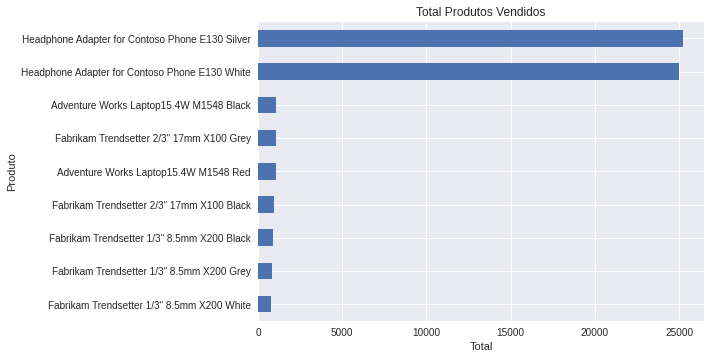

In [32]:
#Contruindo um Gráfico de Barras (horizontal) 
#Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
#Rótulo do eixo horizontal
plt.xlabel("Total")
#Rótulo do eixo vertical
plt.ylabel("Produto");

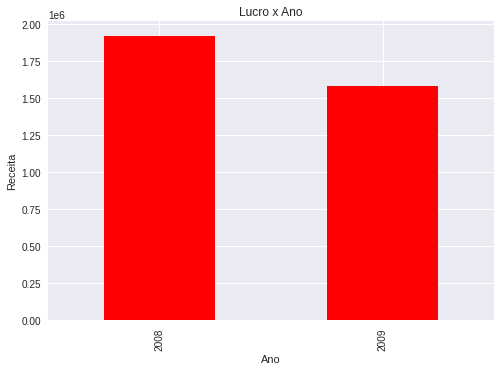

In [71]:
#Contruindo um Gráfico de Barras (Vertical) 
#Total lucro por ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano", color="red") #inserido um título ao gráfico e mudando a cor 
plt.xlabel("Ano")
plt.ylabel("Receita"); #observar a inclusão do ; 

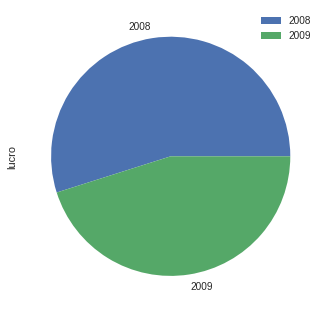

In [72]:
#Gráfico de Pizza
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.pie()
plt.legend();

In [34]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [87]:
#Criando um dataframe apenas com as vendas de 2009
#filtro
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [88]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,trimestre_venda
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,2
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11,2
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,2
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13,2
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4,3


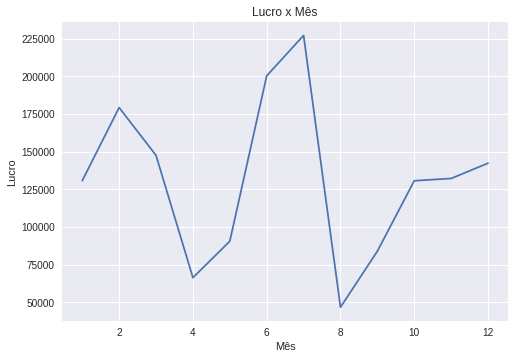

In [89]:
#Contruindo um Gráfico de Linha 
#Total lucro por mês do ano de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

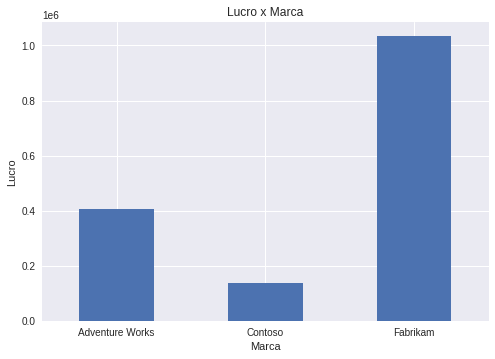

In [38]:
#Contruindo um Gráfico de Barras  
#Total lucro por marca no ano de 2009
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); #Rótulo do eixo x na horizontal

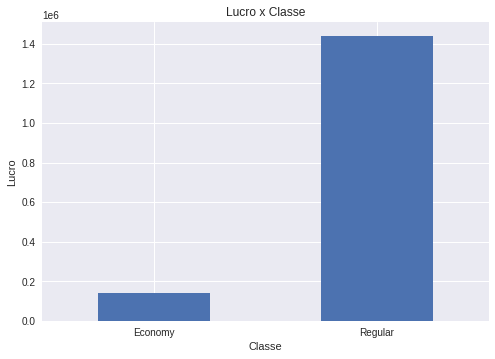

In [39]:
#Contruindo um Gráfico de Barras  
#Total lucro por classe do ano de 2009
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [40]:
#Função DESCRIBE do Pandas gerará, de forma simples e rápida, um conjunto de estatísticas descritivas dessas variáveis: 
#a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo.
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

**Os quartis nada mais são que os percentis 25, 50 e 75, representando respectivamente o primeiro, segundo e terceiro quartil. Veja que o segundo quartil equivale ao percentil 50, valor em que pelo menos 50% da amostra está acima dele e pelo menos 50% está abaixo, ou seja, a definição de mediana**

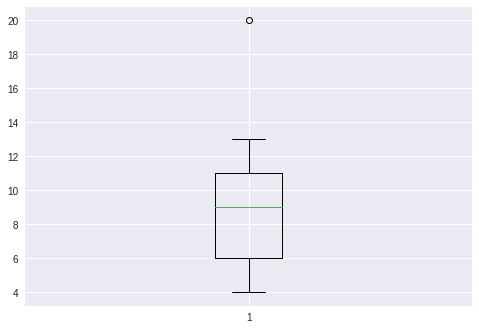

In [41]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.Observe a figura do boxplot. Note que o local onde a haste vertical começa (de baixo para cima) indica o mínimo e, onde a haste termina indica o máximo (excetuando algum possível outlier, idicado po uma bolinha)

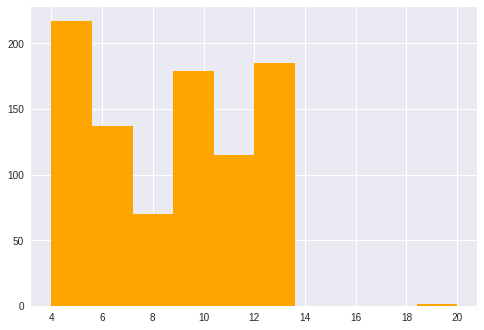

In [78]:
#Histograma
plt.hist(df["Tempo_envio"], color="orange");

Histograma é um gráfico de distribuição de frequência, e que permite analisar visualmente como uma amostra/população está distribuída. Uma das melhores abordagens é plotar a distribuição das variáveis numéricas a fim de criar um conhecimento inicial. O histograma é uma ferramenta da qualidade muito importante para análises estatísticas. É um gráfico que mostra a distribuição de acontecimentos registrados em todo o espectro. Esses acontecimentos registrados são chamados de amostras e são dados coletados de um processo que se queira analisar o comportamento. Histograma também conhecido como diagrama de dispersão de frequências, um histograma consiste em uma representação gráfica de dados que são divididos em classes. Assim, esta representação gráfica é feita com o objetivo de conferir como um processo se comporta em relação a suas especificidades.

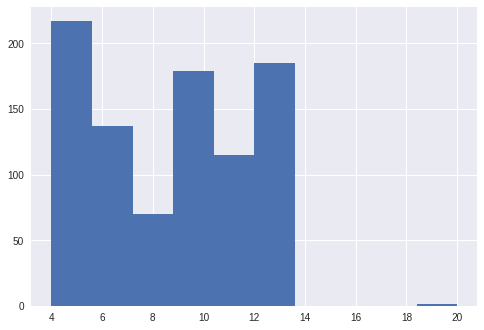

In [43]:
#Salvando o gráfico em PNG
plt.hist(df["Tempo_envio"])
plt.savefig("histograma_Tempo_Envio")


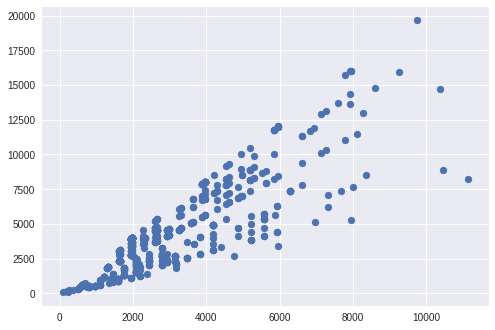

In [44]:
#Gráfico de Dispersão
plt.scatter(x=df["custo"], y=df["lucro"])
#Correlação positiva: As duas medidas crescem na mesma direção.

Os gráficos de dispersão são usados para examinar a associação ou relação entre duas medidas. Por exemplo: data de envio versus ProdutoID. A medição da relação entre duas variáveis é chamada de coeficiente de correlação. Um valor que varia entre -1 e 1. Valores próximos de zero indicam correlação fraca, e valores próximos de -1 ou +1 indicam correlação forte.

In [59]:
#nsamllest
df.nsmallest(3, "Tempo_envio")

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
23,2008-06-28,2008-07-02,199,1178,18850,200806284CS627,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",4
27,2008-10-22,2008-10-26,199,1178,18880,200810224CS785,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",4


In [45]:
#Função MIN exibe o valor mínimo 
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [58]:
#nlargest
df.nlargest(3, "Tempo_envio")

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
21,2008-06-26,2008-07-09,199,1178,18849,200806264CS625,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",13


In [46]:
#Função max exibe o valor Máximo
#Tempo máximo de envio
df['Tempo_envio'].max()

20

In [73]:
#Identificando o Outlier (visualizado no Box Plot)
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,trimestre_venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20,2


In [48]:
#Salvando o dataframe como arquivo .csv
df.to_csv("df_vendas_novo.csv", index=False)